In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima.drop(0, inplace=True)
pima.reset_index(drop=True, inplace=True)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

The data is the same as in the logistic regression tutorial.

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [6]:
X_train, y_train

(    pregnant insulin   bmi age glucose  bp pedigree
 88        15     110  37.1  43     136  70    0.153
 467        0     100  36.8  25      97  64      0.6
 550        1       0  27.4  21     116  70    0.204
 147        2     119  30.5  34     106  64      1.4
 481        0       0  35.2  29     123  88    0.197
 ..       ...     ...   ...  ..     ...  ..      ...
 645        2     440  39.4  30     157  74    0.134
 715        7     392  33.9  34     187  50    0.826
 72        13       0  43.4  42     126  90    0.583
 235        4       0  43.6  26     171  72    0.479
 37         9       0  32.9  46     102  76    0.665
 
 [537 rows x 7 columns],
 88     1
 467    0
 550    0
 147    0
 481    0
       ..
 645    0
 715    1
 72     1
 235    1
 37     1
 Name: label, Length: 537, dtype: object)

In [7]:
X_test, y_test

(    pregnant insulin   bmi age glucose  bp pedigree
 285        7     135    26  51     136  74    0.647
 101        1       0  26.1  22     151  60    0.179
 581        6       0    25  27     109  60    0.206
 352        3       0  34.4  46      61  82    0.243
 726        1     180  36.1  25     116  78    0.496
 ..       ...     ...   ...  ..     ...  ..      ...
 241        4      88  33.1  22      91  70    0.446
 599        1     120  23.1  26     109  38    0.407
 650        1     100  25.2  23      91  54    0.234
 11        10       0    38  34     168  74    0.537
 214        9     175  34.2  36     112  82     0.26
 
 [231 rows x 7 columns],
 285    0
 101    0
 581    0
 352    0
 726    0
       ..
 241    0
 599    0
 650    0
 11     1
 214    1
 Name: label, Length: 231, dtype: object)

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
y_pred, y_test # Predicted and true classes.

(array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0',
        '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1',
        '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
        '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
        '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1',
        '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
        '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0',
        '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0',
        '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
        '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
        '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
        '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1',
        '1', '1', '1', '1', '0', '1', '0', '1', '0'

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [11]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

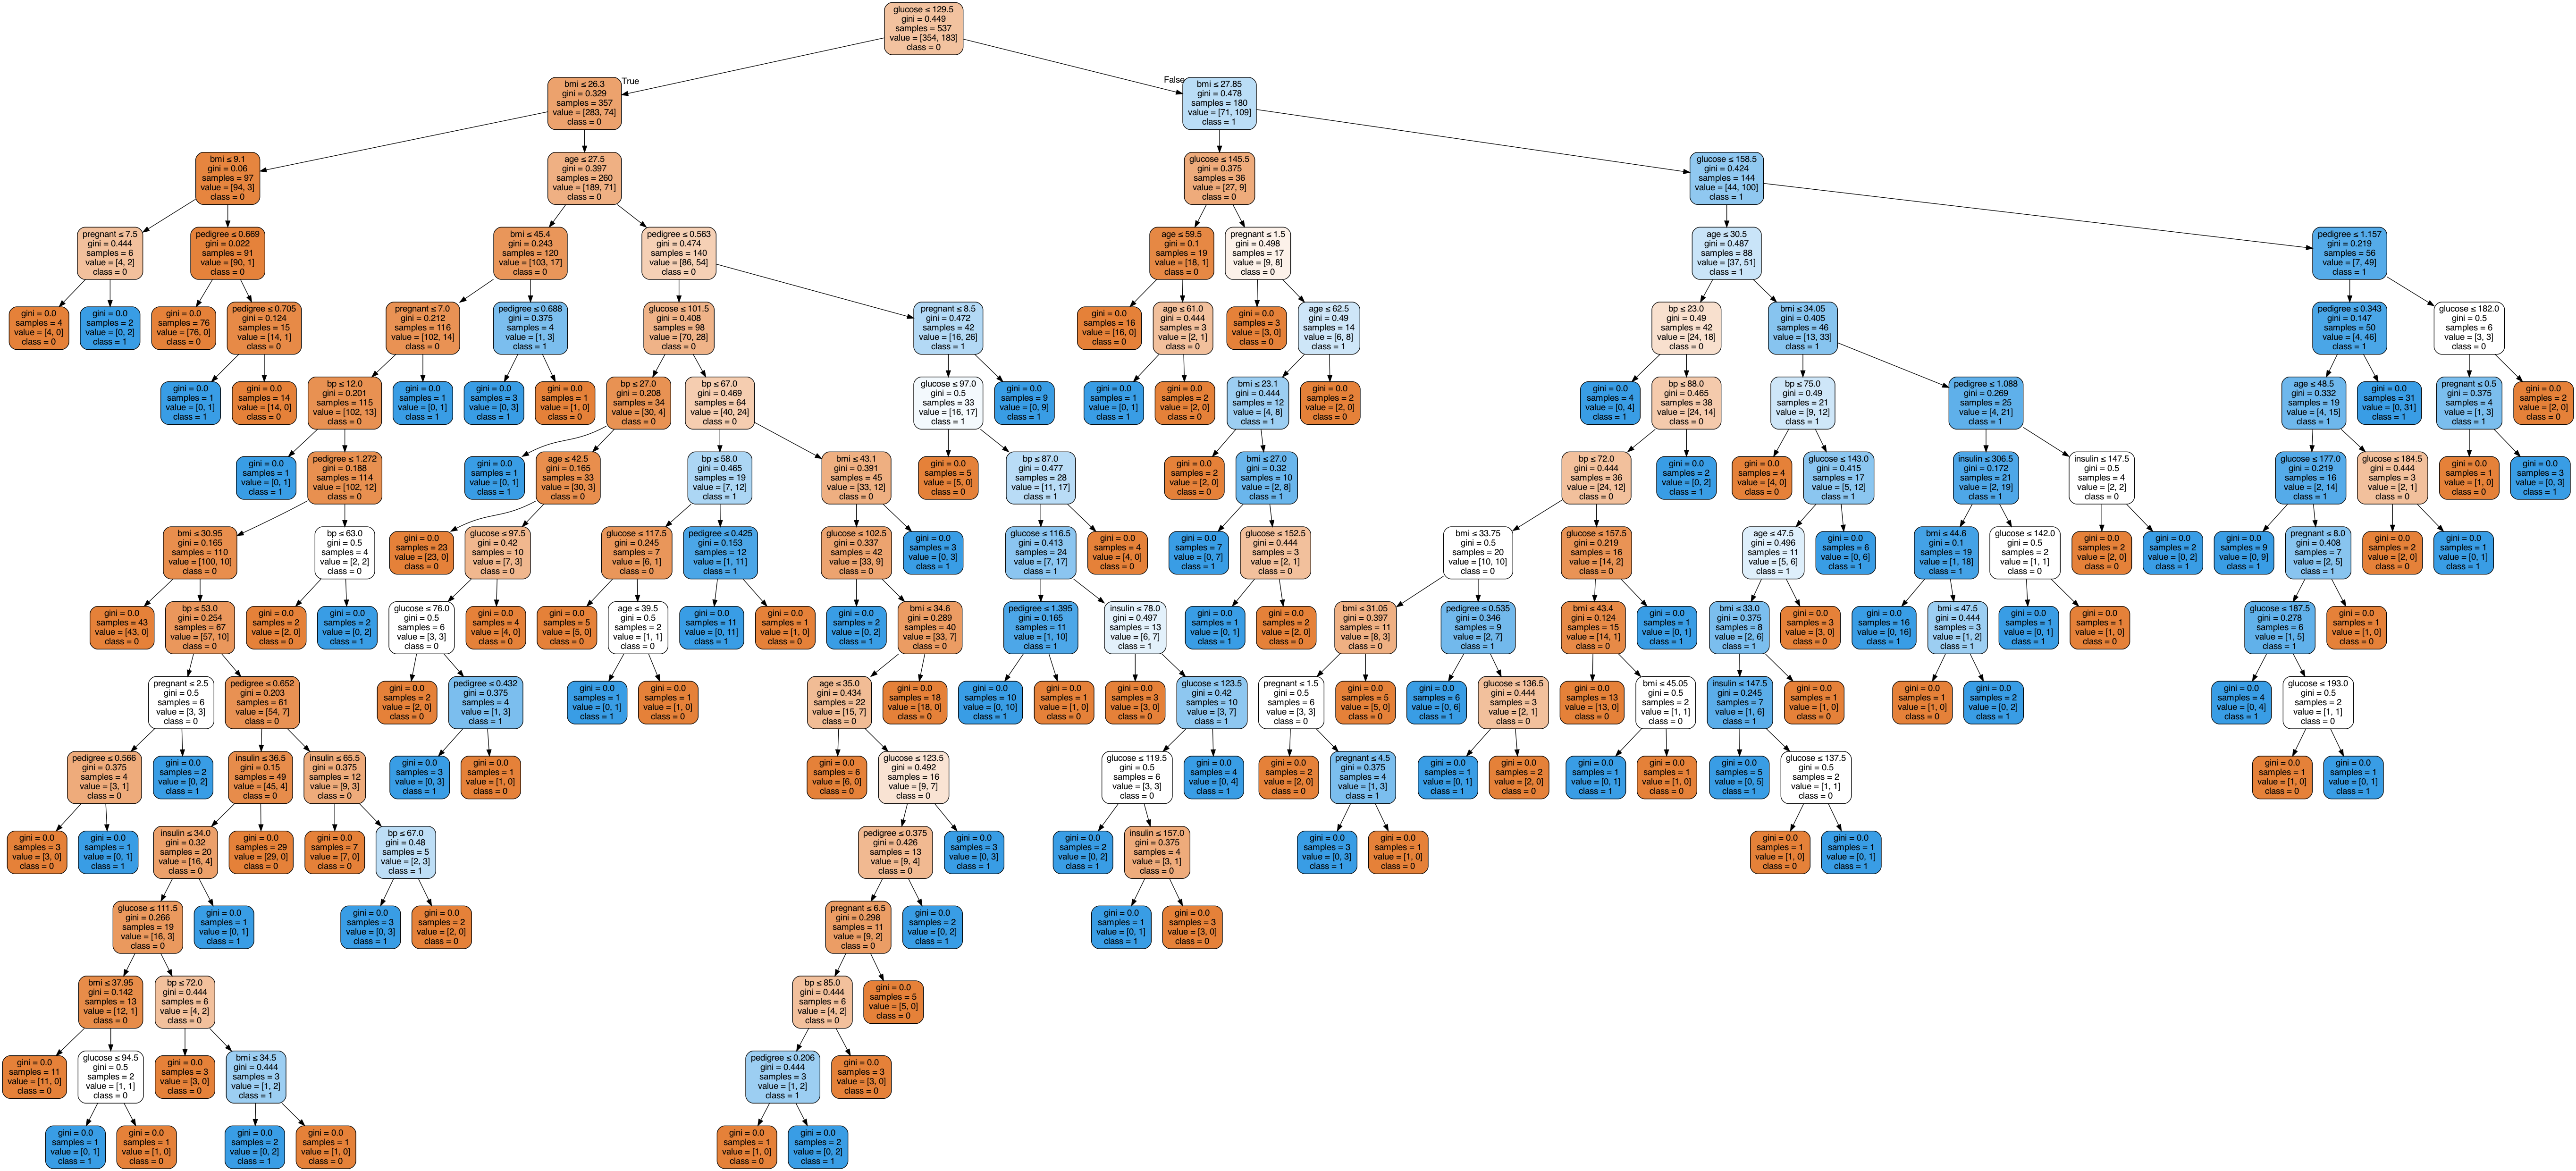

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [14]:
y_pred, y_test # Predicted and true classes.

(array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
        '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
        '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0',
        '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
        '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0',
        '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1',
        '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0',
        '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1',
        '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
        '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
        '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
        '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1',
        '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1',
        '1', '1', '1', '0', '0', '1', '0', '0', '0'

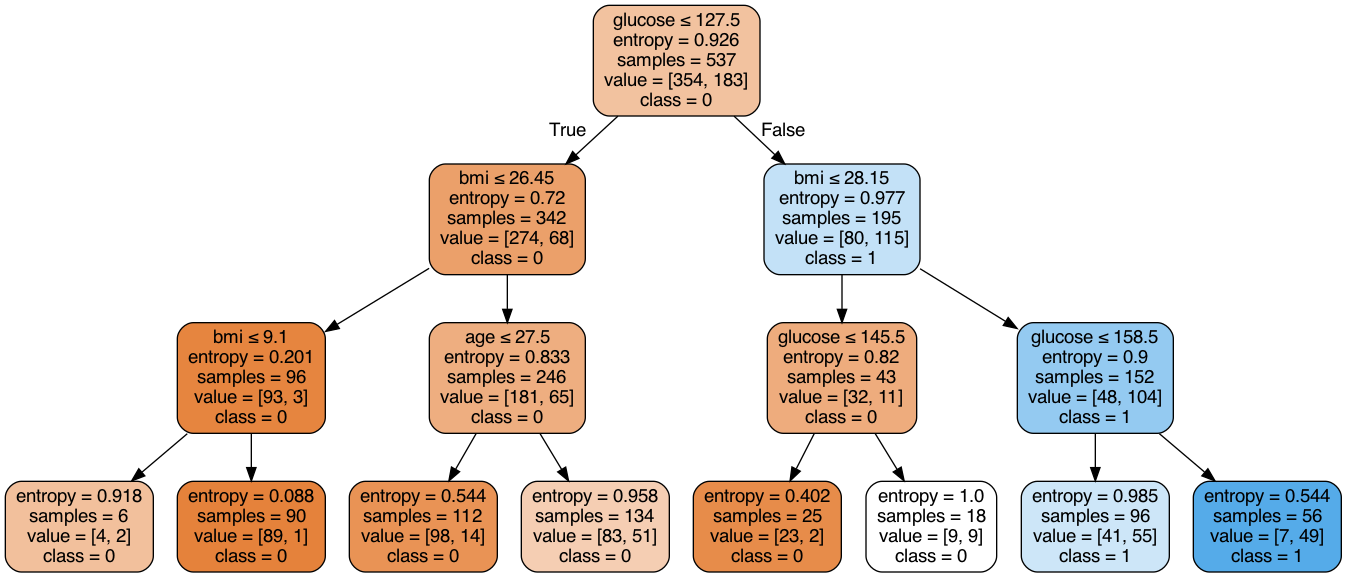

In [15]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())